In [1]:
from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
import random

# Training

In [2]:
#based off https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to("cpu")
                labels = labels.to("cpu")

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

        print()

In [3]:
model_ft = models.alexnet(pretrained=True)
for param in model_ft.parameters():
    param.requires_grad = False
num_ftrs = model_ft.classifier[6].in_features
model_ft.classifier[6] = nn.Linear(num_ftrs, 2)
input_size = 224

In [4]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join("./alex_data", x), data_transforms[x]) for x in ['train', 'val']}
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size= 8, shuffle=True, num_workers=4) for x in ['train', 'val']}

In [5]:
model_ft = model_ft.to("cpu")

params_to_update = []
for name,param in model_ft.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

In [8]:
train_model(model_ft, dataloaders_dict, nn.CrossEntropyLoss(), optimizer_ft, num_epochs=15)

Epoch 0/14
----------
train Loss: 0.1439 Acc: 0.9364
val Loss: 0.6673 Acc: 0.7500

Epoch 1/14
----------
train Loss: 0.2289 Acc: 0.9000
val Loss: 0.6089 Acc: 0.7679

Epoch 2/14
----------
train Loss: 0.1043 Acc: 0.9636
val Loss: 0.5258 Acc: 0.8214

Epoch 3/14
----------
train Loss: 0.1126 Acc: 0.9500
val Loss: 0.7231 Acc: 0.7857

Epoch 4/14
----------
train Loss: 0.1199 Acc: 0.9591
val Loss: 0.6131 Acc: 0.8036

Epoch 5/14
----------
train Loss: 0.1221 Acc: 0.9545
val Loss: 1.0459 Acc: 0.7143

Epoch 6/14
----------
train Loss: 0.1336 Acc: 0.9364
val Loss: 0.5977 Acc: 0.7857

Epoch 7/14
----------
train Loss: 0.1130 Acc: 0.9682
val Loss: 0.7422 Acc: 0.7857

Epoch 8/14
----------
train Loss: 0.1567 Acc: 0.9636
val Loss: 0.7543 Acc: 0.7500

Epoch 9/14
----------
train Loss: 0.1300 Acc: 0.9545
val Loss: 0.6078 Acc: 0.7857

Epoch 10/14
----------
train Loss: 0.2297 Acc: 0.9136
val Loss: 0.6726 Acc: 0.7857

Epoch 11/14
----------
train Loss: 0.2614 Acc: 0.9045
val Loss: 0.4295 Acc: 0.7857

Ep

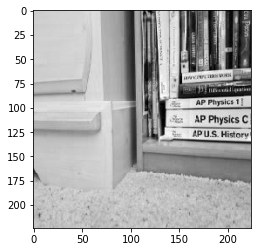

Eat all you want :)


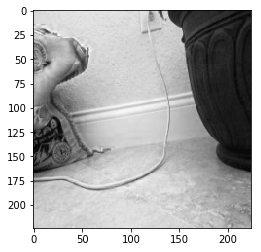

Wires ahead!


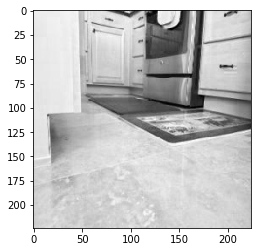

Wires ahead!


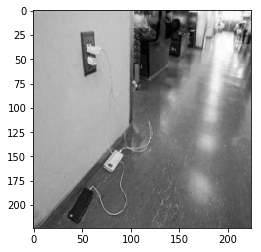

Wires ahead!


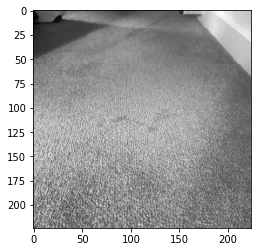

Eat all you want :)


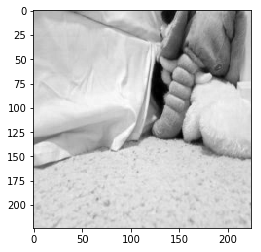

Eat all you want :)


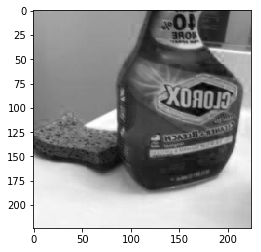

Eat all you want :)


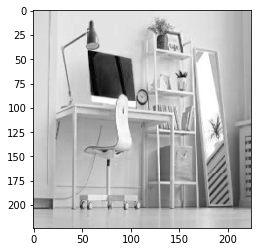

Eat all you want :)


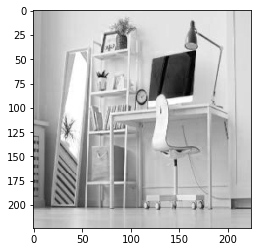

Wires ahead!


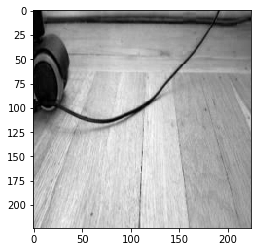

Wires ahead!


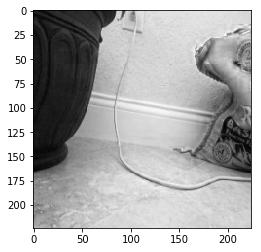

Wires ahead!


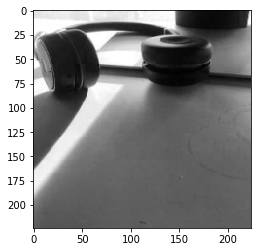

Eat all you want :)


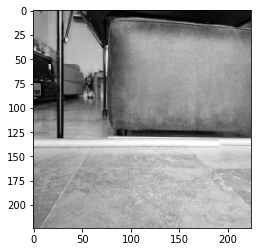

Eat all you want :)


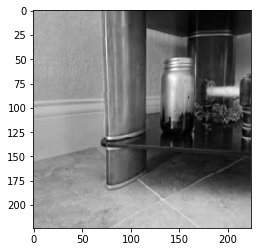

Eat all you want :)


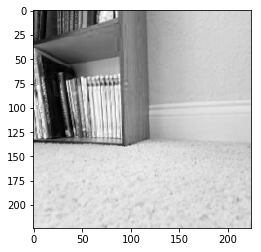

Eat all you want :)


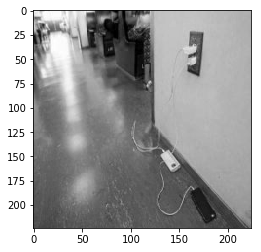

Wires ahead!


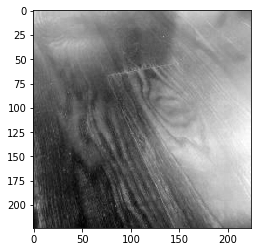

Eat all you want :)


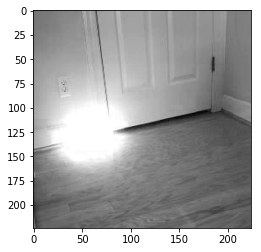

Eat all you want :)


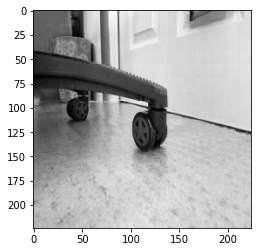

Wires ahead!


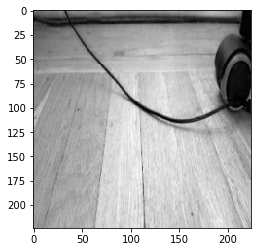

Wires ahead!


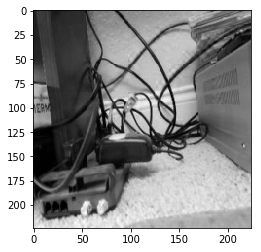

Wires ahead!


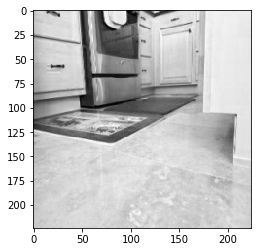

Wires ahead!


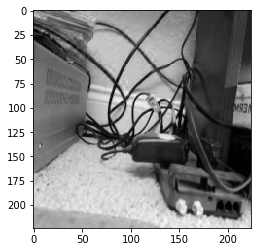

Wires ahead!


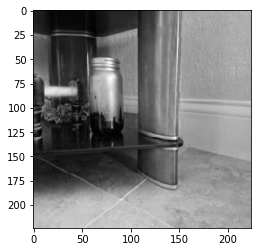

Eat all you want :)


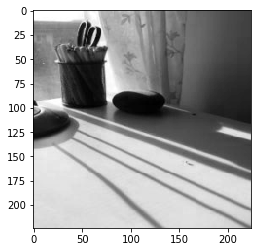

Wires ahead!


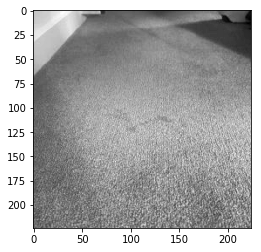

Eat all you want :)


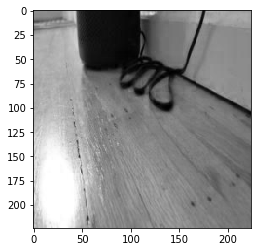

Wires ahead!


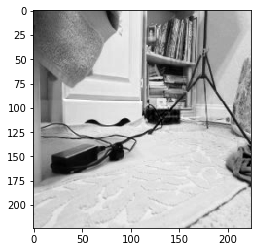

Wires ahead!


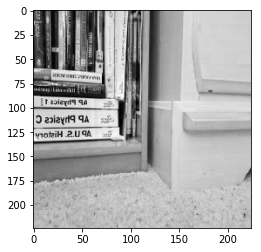

Eat all you want :)


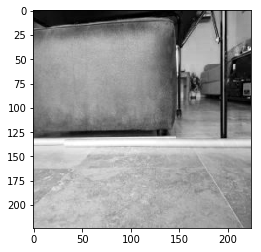

Eat all you want :)


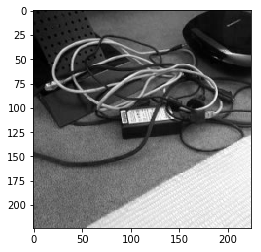

Wires ahead!


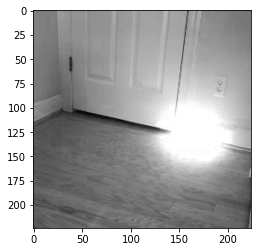

Eat all you want :)


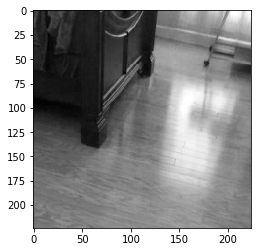

Wires ahead!


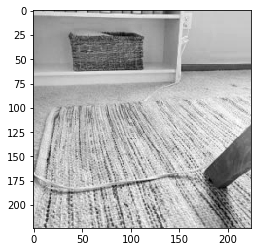

Eat all you want :)


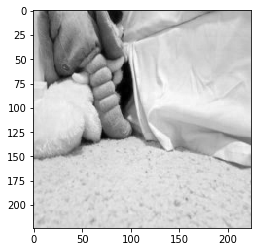

Eat all you want :)


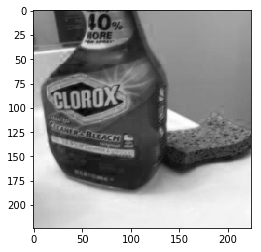

Eat all you want :)


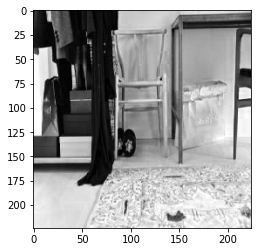

Eat all you want :)


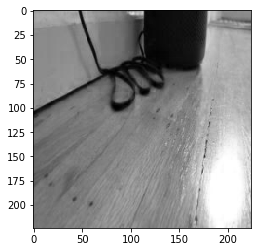

Wires ahead!


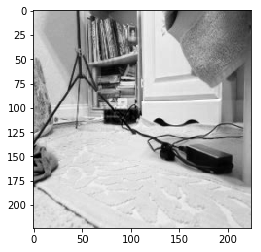

Wires ahead!


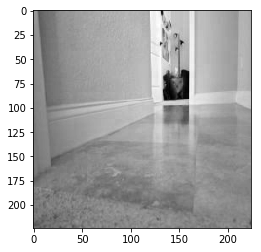

Eat all you want :)


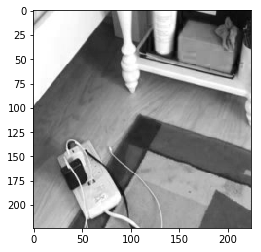

Wires ahead!


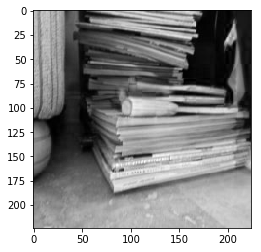

Wires ahead!


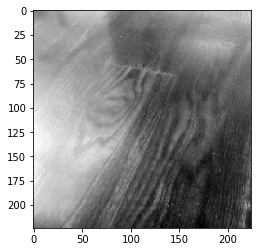

Eat all you want :)


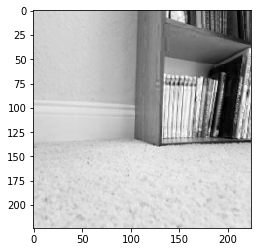

Eat all you want :)


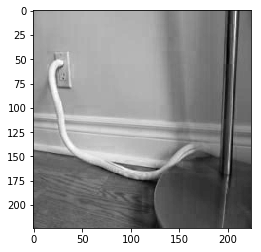

Wires ahead!


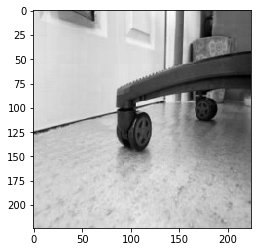

Wires ahead!


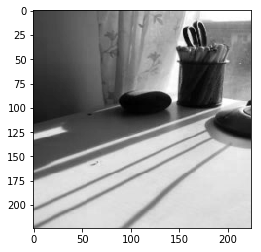

Eat all you want :)


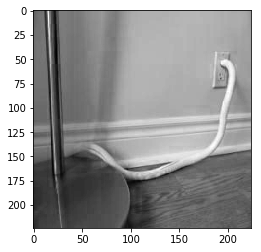

Wires ahead!


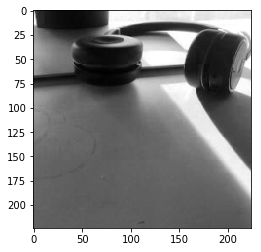

Eat all you want :)


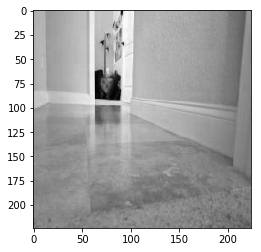

Eat all you want :)


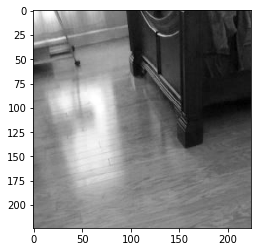

Wires ahead!


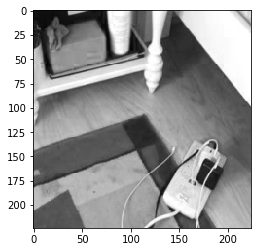

Wires ahead!


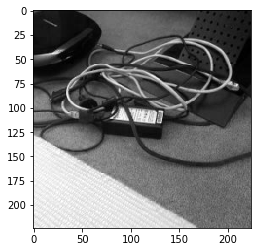

Wires ahead!


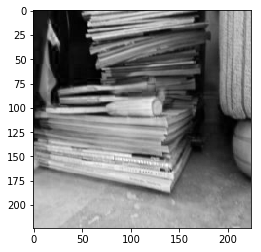

Wires ahead!


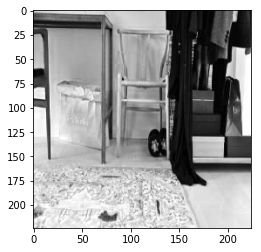

Eat all you want :)


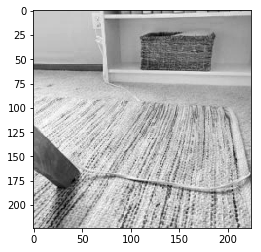

Eat all you want :)


In [10]:
model_ft.eval()
for inputs, labels in dataloaders_dict["val"]:
    inputs = inputs.to("cpu")
    labels = labels.to("cpu")
    outputs = model_ft(inputs)
    _, preds = torch.max(outputs, 1)
    for i in range(8):
        x = torch.reshape(inputs[i, 0, :, :], (224, 224))
        plt.imshow(x, cmap = 'gray')
        plt.show()
        if preds[i] == 1:
            print("Wires ahead!")
        else:
            print("Eat all you want :)")

# Loading Parameters from Saved Model

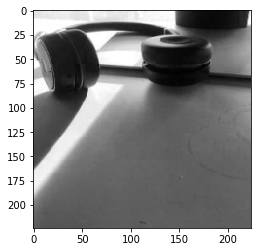

Eat all you want :)


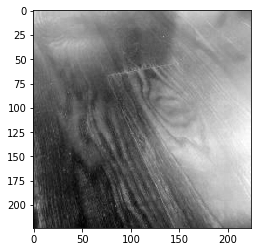

Eat all you want :)


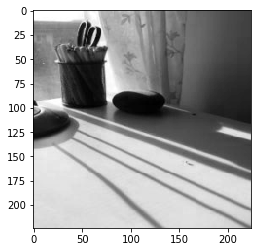

Eat all you want :)


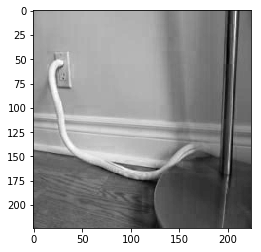

Wires ahead!


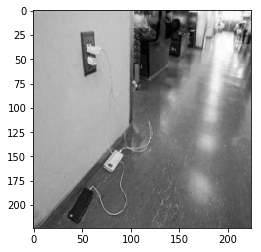

Eat all you want :)


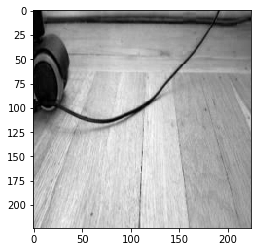

Wires ahead!


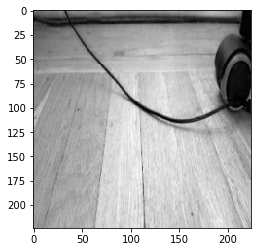

Wires ahead!


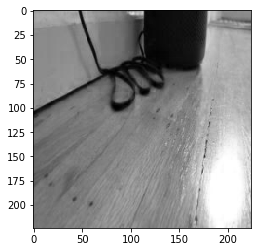

Wires ahead!


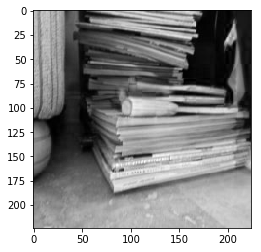

Eat all you want :)


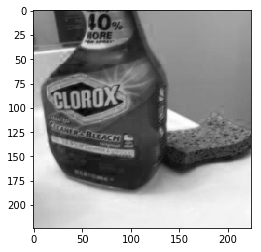

Eat all you want :)


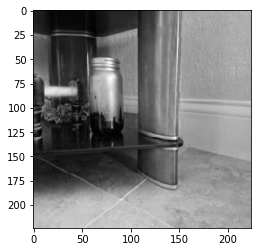

Eat all you want :)


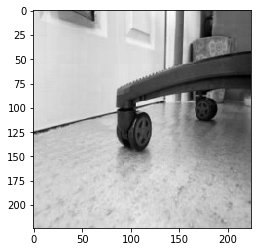

Eat all you want :)


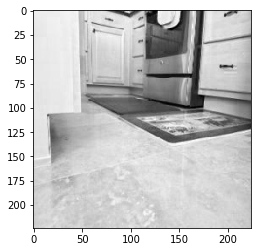

Eat all you want :)


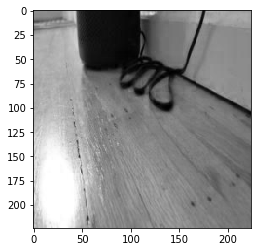

Wires ahead!


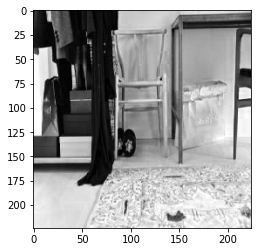

Eat all you want :)


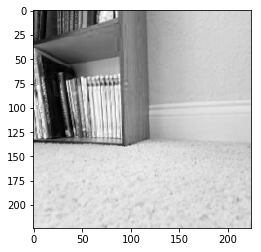

Eat all you want :)


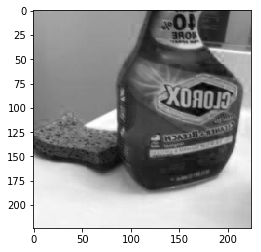

Eat all you want :)


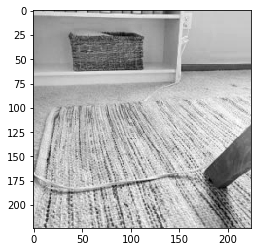

Eat all you want :)


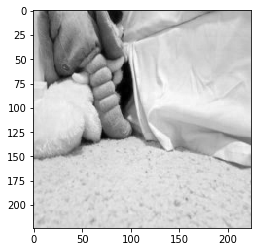

Eat all you want :)


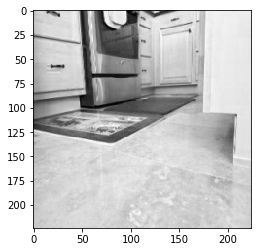

Eat all you want :)


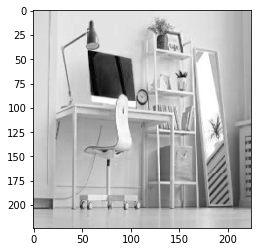

Eat all you want :)


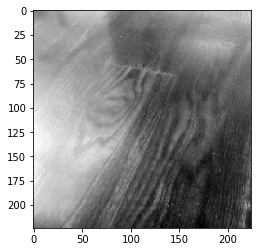

Eat all you want :)


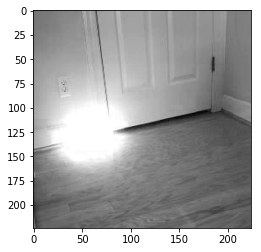

Eat all you want :)


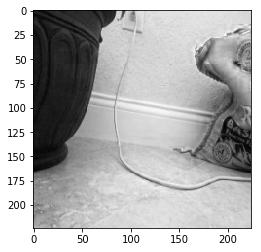

Eat all you want :)


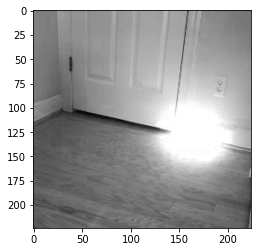

Eat all you want :)


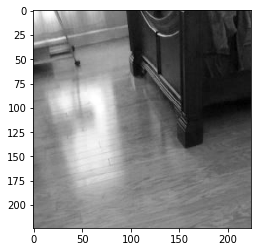

Eat all you want :)


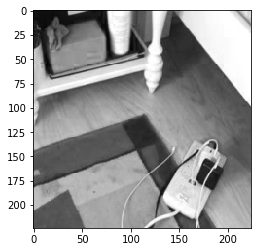

Wires ahead!


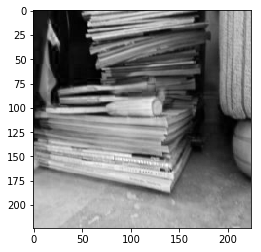

Eat all you want :)


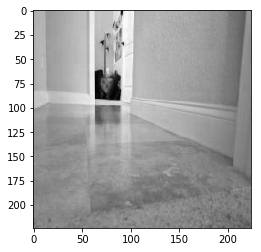

Eat all you want :)


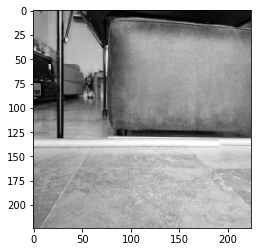

Eat all you want :)


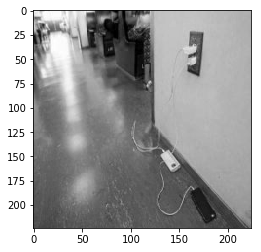

Eat all you want :)


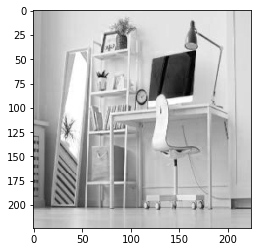

Eat all you want :)


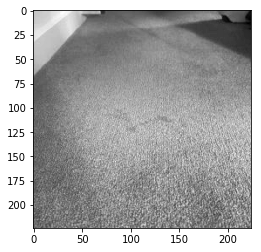

Eat all you want :)


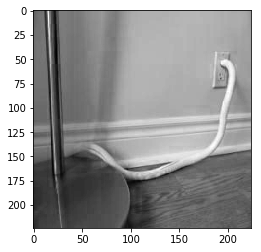

Wires ahead!


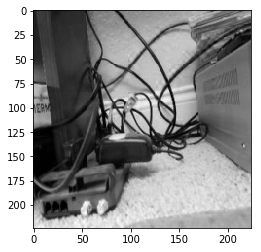

Wires ahead!


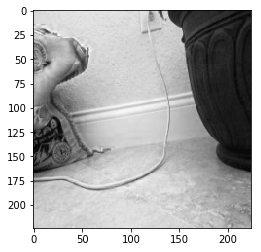

Wires ahead!


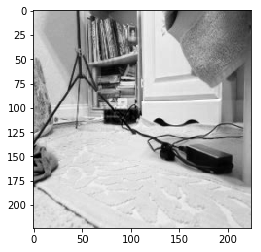

Wires ahead!


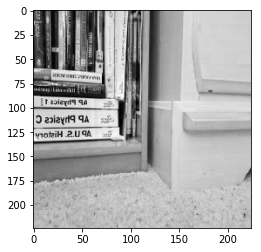

Eat all you want :)


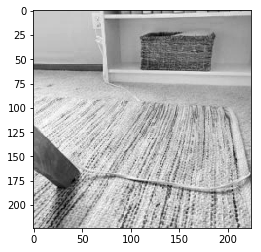

Eat all you want :)


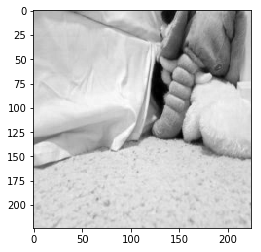

Eat all you want :)


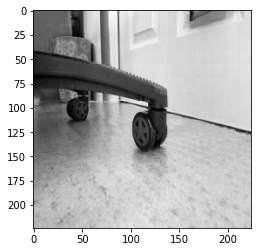

Eat all you want :)


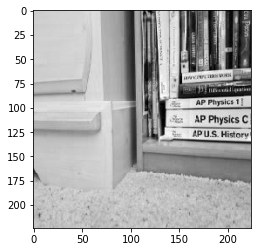

Eat all you want :)


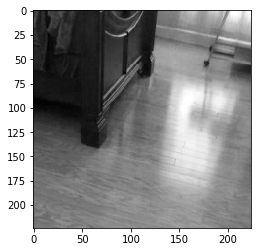

Eat all you want :)


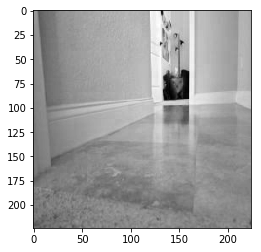

Eat all you want :)


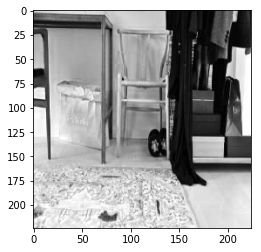

Eat all you want :)


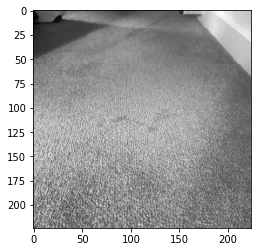

Eat all you want :)


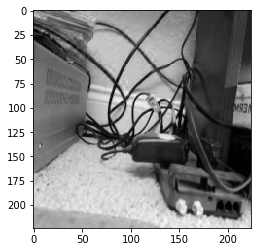

Wires ahead!


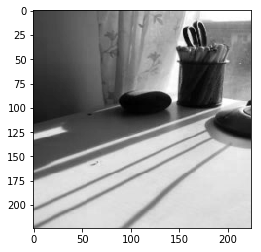

Eat all you want :)


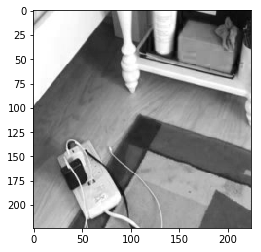

Wires ahead!


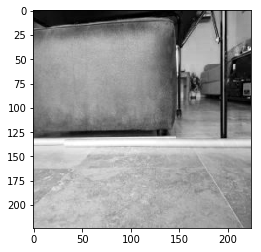

Eat all you want :)


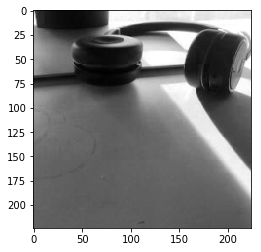

Eat all you want :)


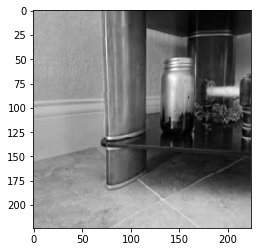

Eat all you want :)


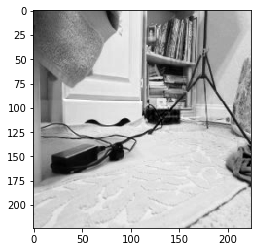

Wires ahead!


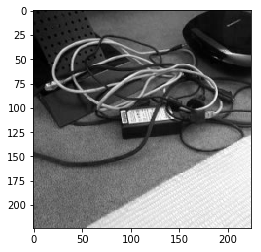

Wires ahead!


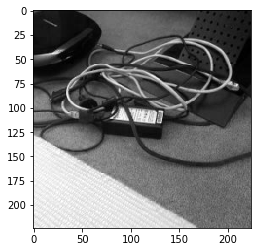

Wires ahead!


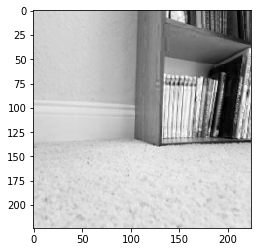

Eat all you want :)


In [6]:
t = torch.load("best.pt")
t.eval()
for inputs, labels in dataloaders_dict["val"]:
    inputs = inputs.to("cpu")
    labels = labels.to("cpu")
    outputs = t(inputs)
    _, preds = torch.max(outputs, 1)
    for i in range(8):
        x = torch.reshape(inputs[i, 0, :, :], (224, 224))
        plt.imshow(x, cmap = 'gray')
        plt.show()
        if preds[i] == 1:
            print("Wires ahead!")
        else:
            print("Eat all you want :)")